In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = r'C:\Users\nicar\Desktop\Project_3\processed_data_csv.csv'  # Replace with your file path
data = pd.read_csv(file_path)



In [2]:
# Ensure numeric data types for calculations
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [3]:
# Group the data by year and calculate relevant metrics
grouped_data_full = data.groupby('year').agg({
    'budget': 'sum',
    'gross_us_canada': 'sum',
    'gross_world_wide': 'sum',
    'nominations': 'sum',
    'oscars': 'sum',
    'votes': 'sum',
    'rating': 'mean'
}).reset_index()

In [4]:
# Calculate relative changes (percentage changes)
grouped_data_full['budget_change'] = grouped_data_full['budget'].pct_change() * 100
grouped_data_full['gross_us_change'] = grouped_data_full['gross_us_canada'].pct_change() * 100
grouped_data_full['gross_world_change'] = grouped_data_full['gross_world_wide'].pct_change() * 100
grouped_data_full['nominations_change'] = grouped_data_full['nominations'].pct_change() * 100
grouped_data_full['oscars_change'] = grouped_data_full['oscars'].pct_change() * 100
grouped_data_full['votes_change'] = grouped_data_full['votes'].pct_change() * 100
grouped_data_full['avg_rating_change'] = grouped_data_full['rating'].pct_change() * 100


In [5]:
# Raw variables for analysis
raw_variables_to_analyze = {
    'gross_us_canada': 'Gross US Revenue',
    'gross_world_wide': 'Gross Worldwide Revenue',
    'nominations': 'Nominations',
    'oscars': 'Oscars',
    'votes': 'Votes',
    'rating': 'Average Rating',
}

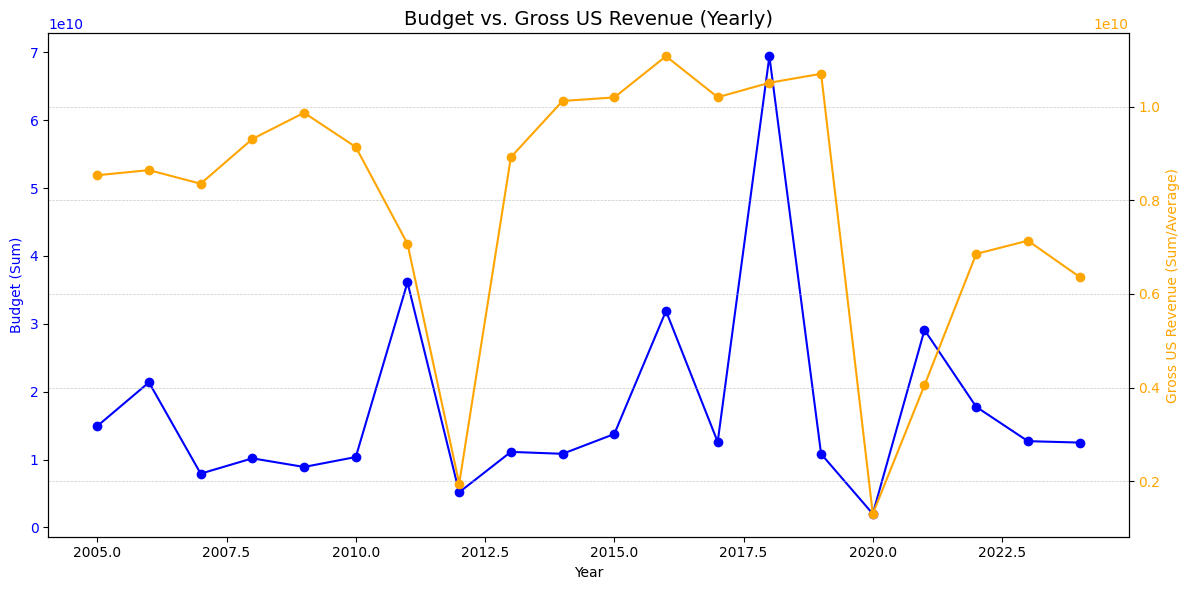

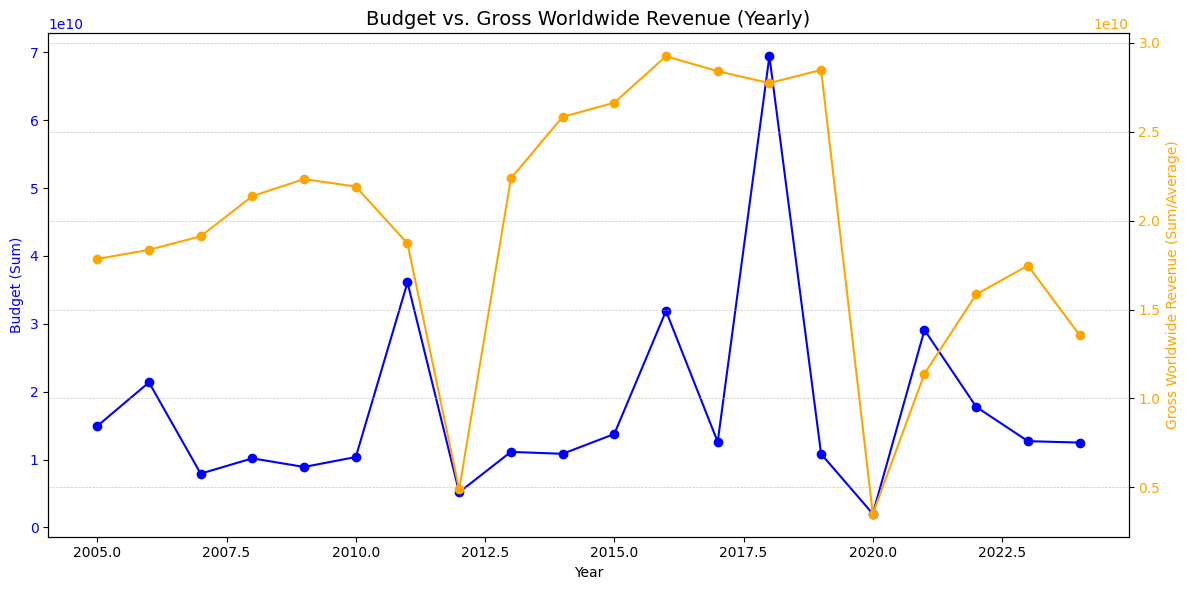

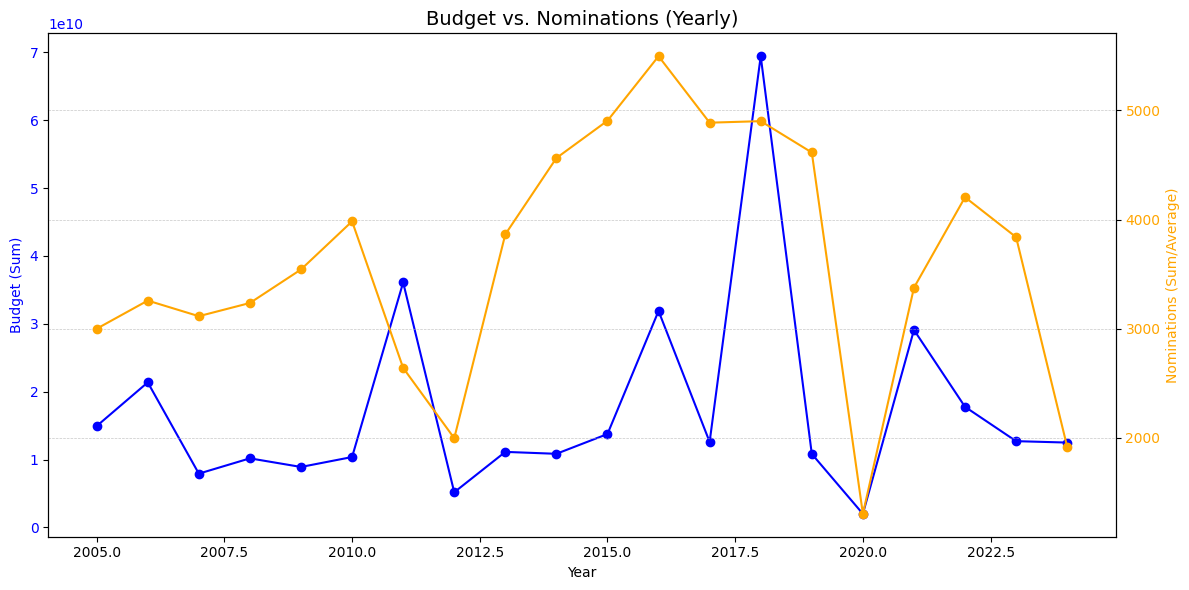

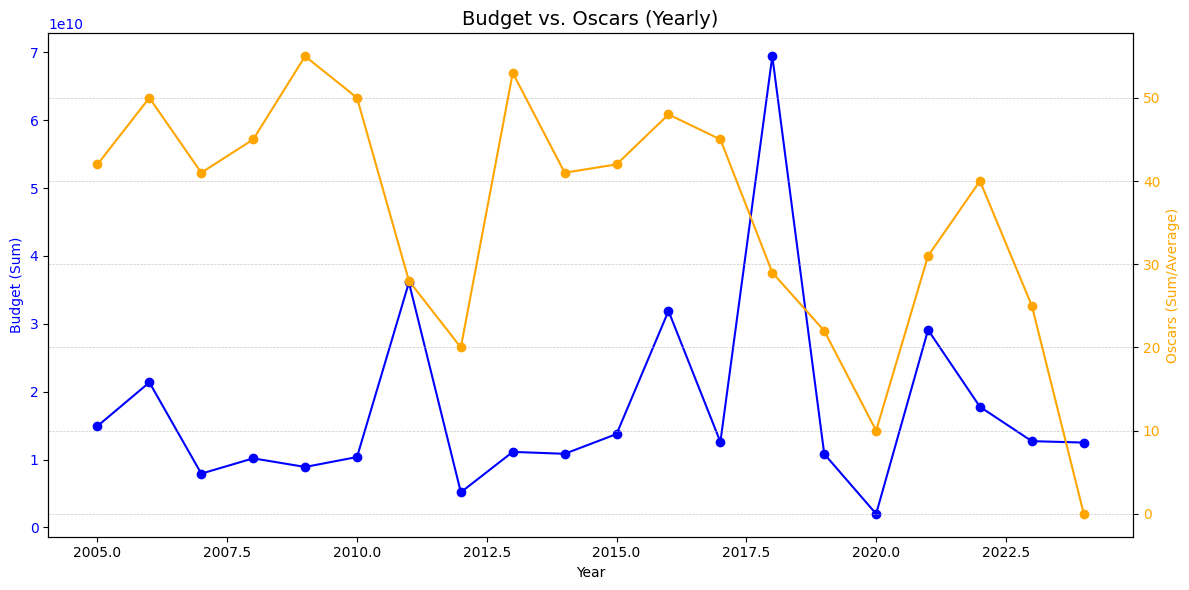

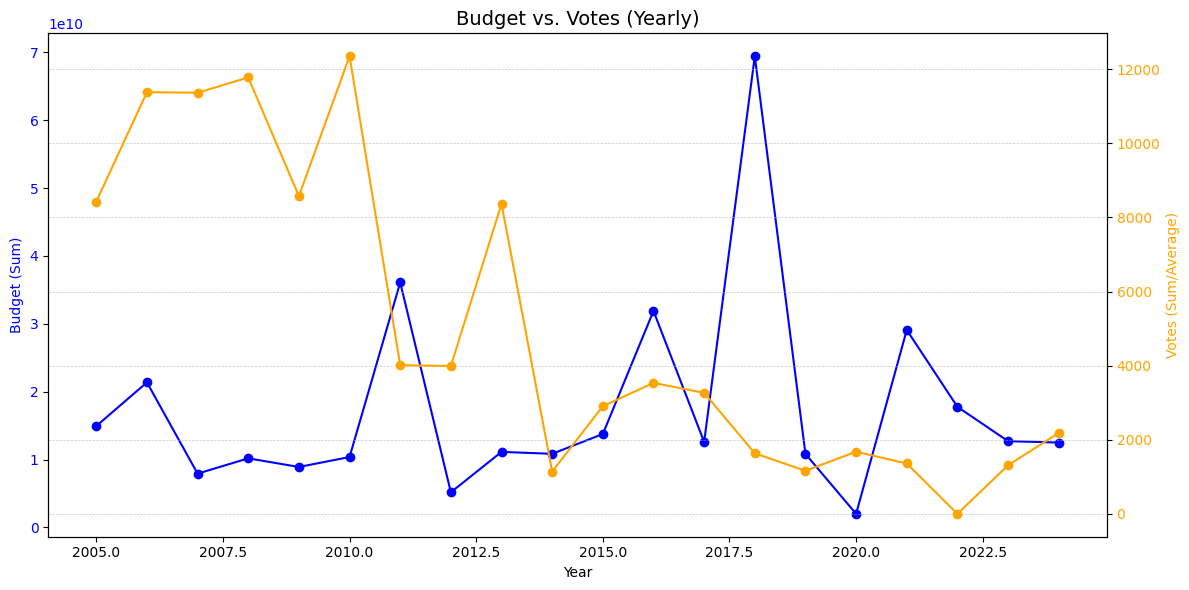

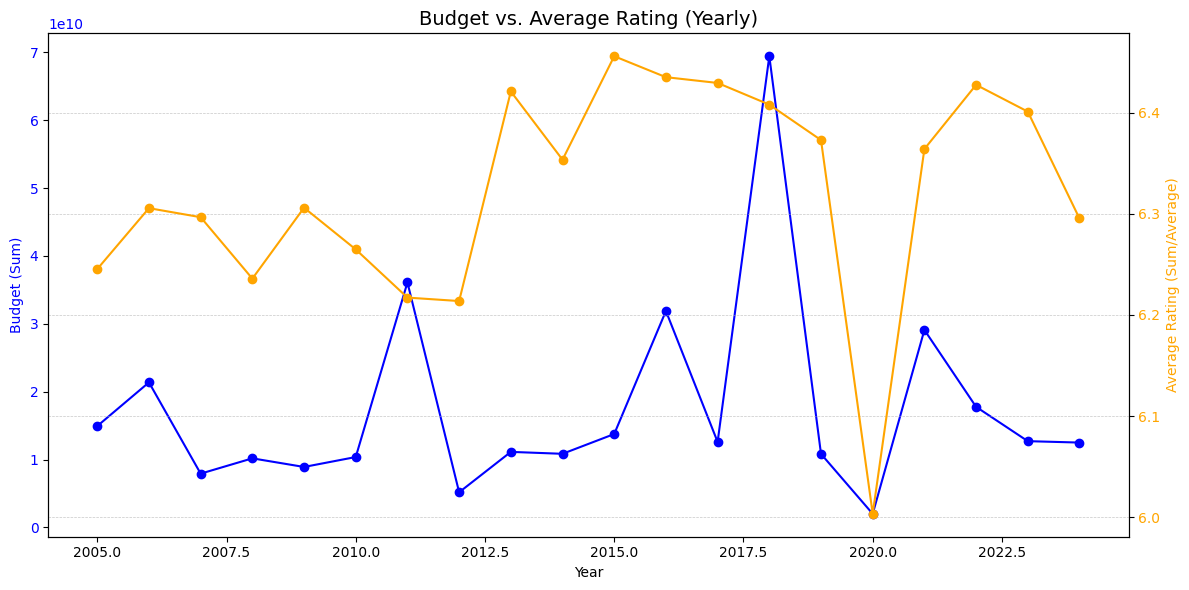

In [6]:
# Plot the raw sums and averages with a secondary y-axis
for variable, label in raw_variables_to_analyze.items():
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot budget on the primary y-axis
    ax1.plot(grouped_data_full['year'], grouped_data_full['budget'], label='Budget (Sum)', marker='o', color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Budget (Sum)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for the other variable
    ax2 = ax1.twinx()
    ax2.plot(grouped_data_full['year'], grouped_data_full[variable], label=f'{label} (Sum/Average)', marker='o', color='orange')
    ax2.set_ylabel(f'{label} (Sum/Average)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Add title and grid
    plt.title(f'Budget vs. {label} (Yearly)', fontsize=14)
    fig.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

In [7]:
# Relative change variables for correlation analysis
relative_variables_to_analyze = {
    'gross_us_change': 'Gross US Change (%)',
    'gross_world_change': 'Gross Worldwide Change (%)',
    'nominations_change': 'Nominations Change (%)',
    'oscars_change': 'Oscars Change (%)',
    'votes_change': 'Votes Change (%)',
    'avg_rating_change': 'Average Rating Change (%)',
}

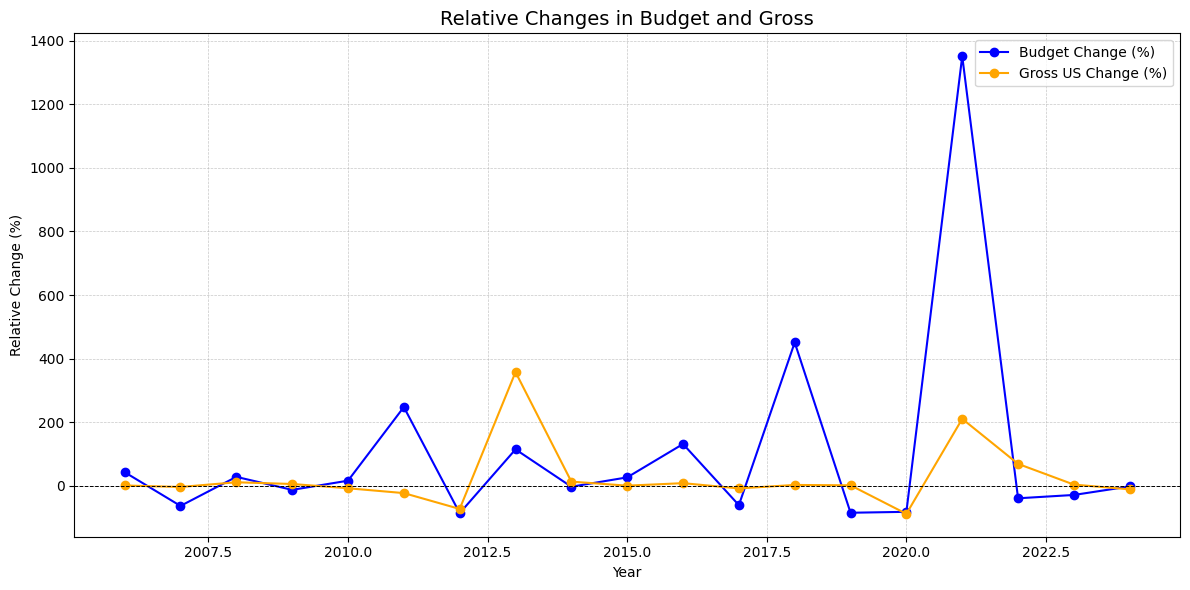

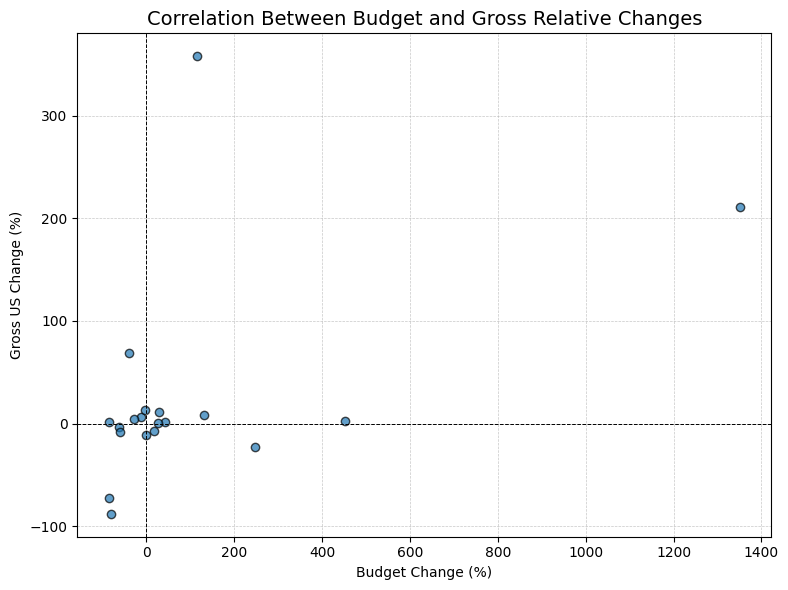

Correlation coefficient between Budget Change and Gross Relative Changes: 0.48


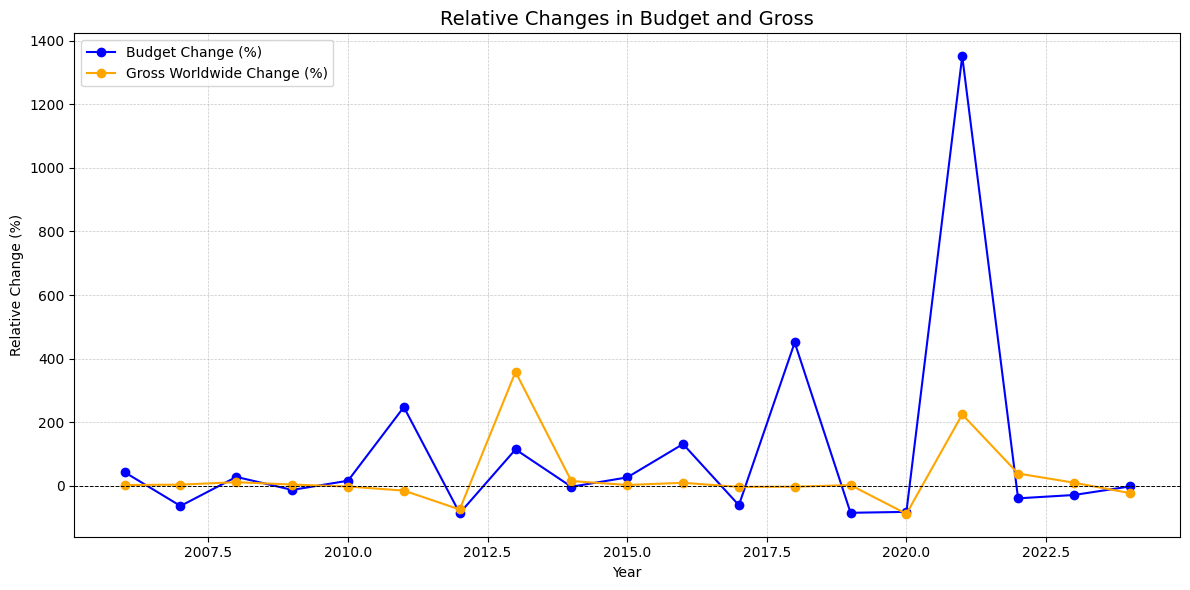

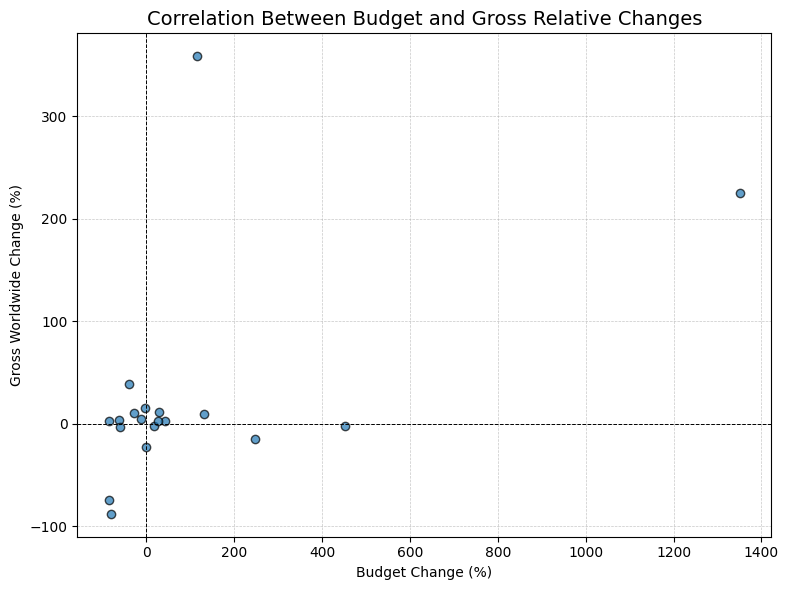

Correlation coefficient between Budget Change and Gross Relative Changes: 0.51


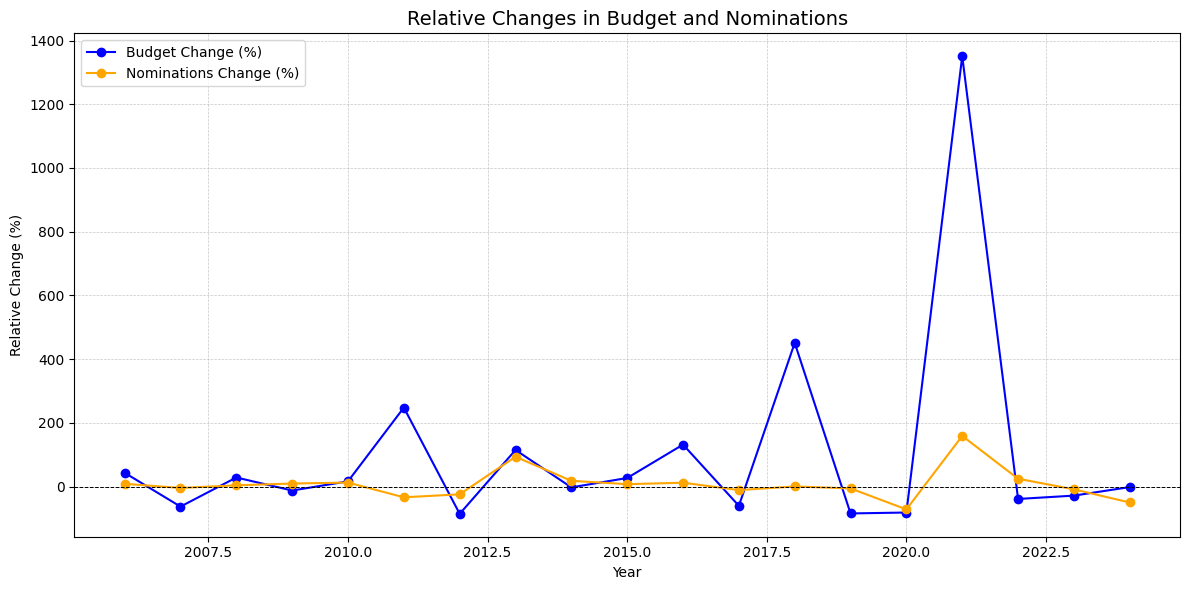

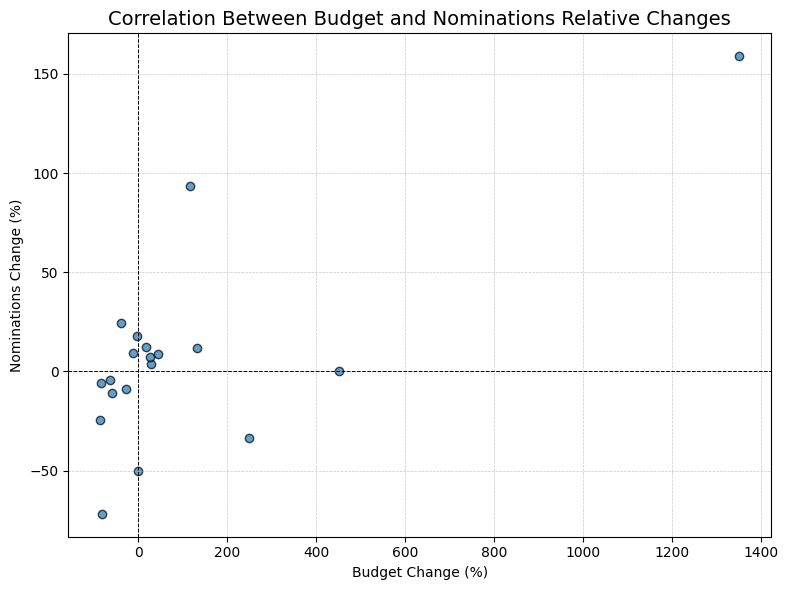

Correlation coefficient between Budget Change and Nominations Relative Changes: 0.73


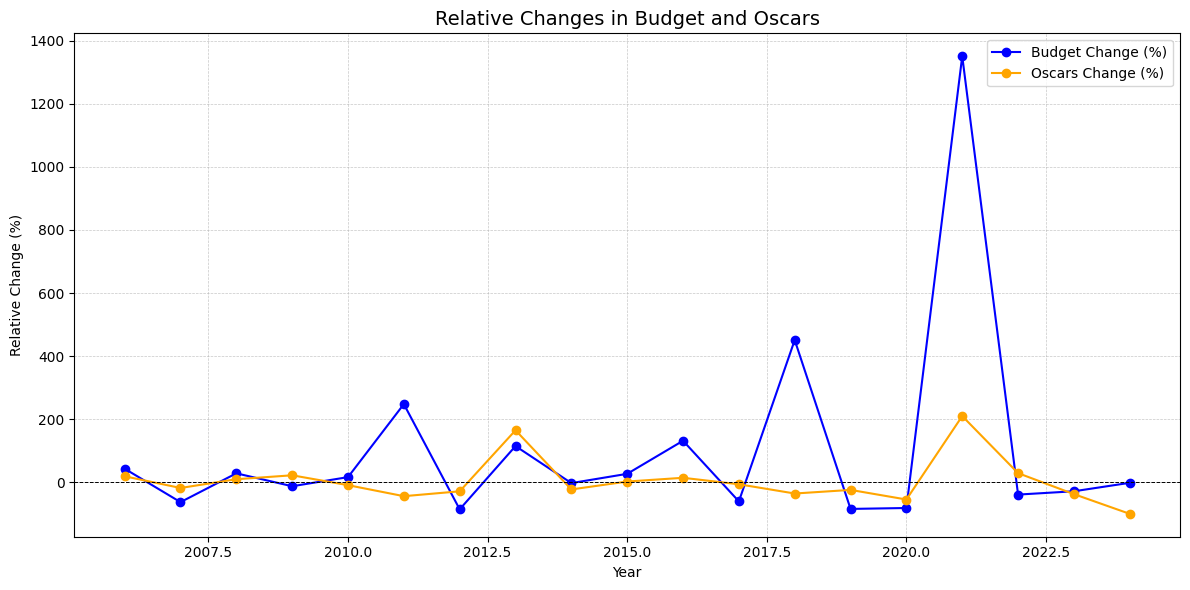

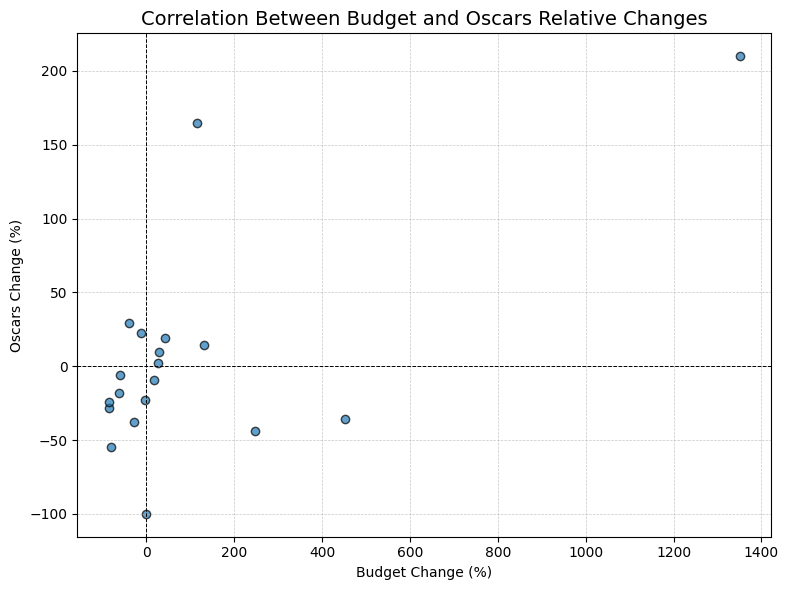

Correlation coefficient between Budget Change and Oscars Relative Changes: 0.66


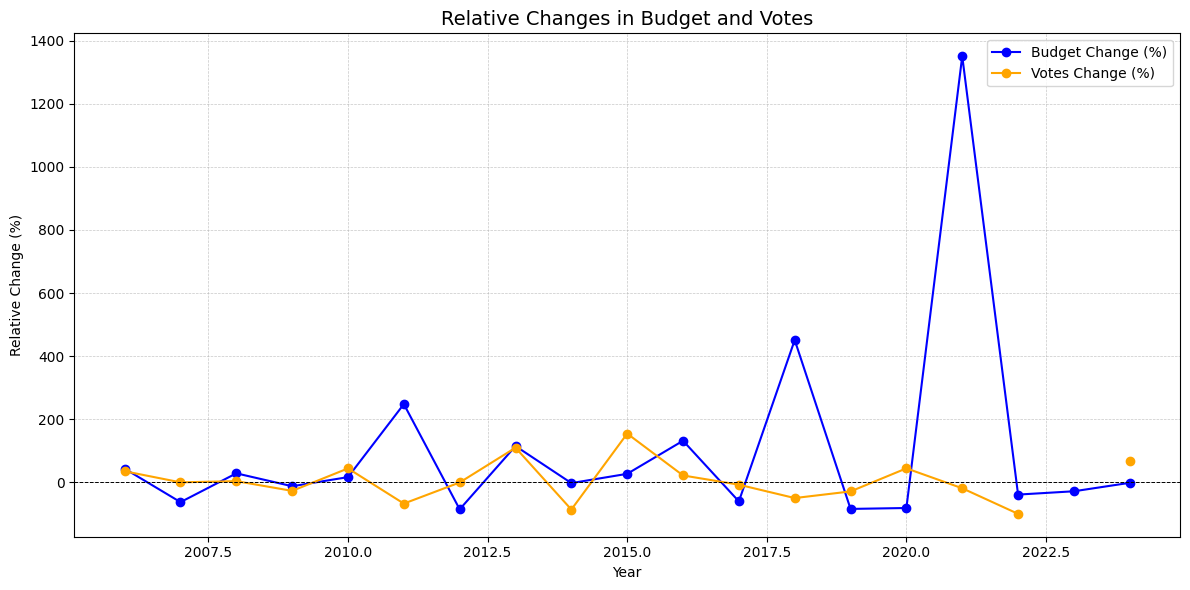

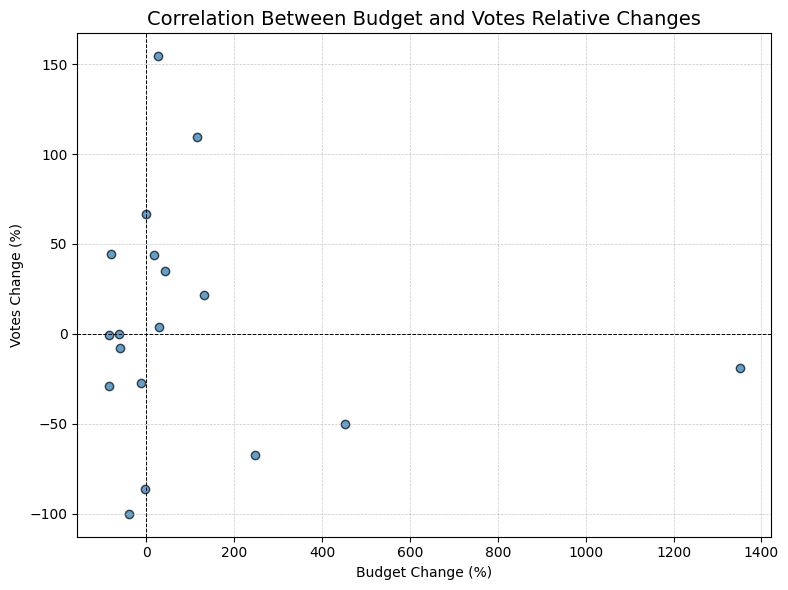

Correlation coefficient between Budget Change and Votes Relative Changes: -0.13


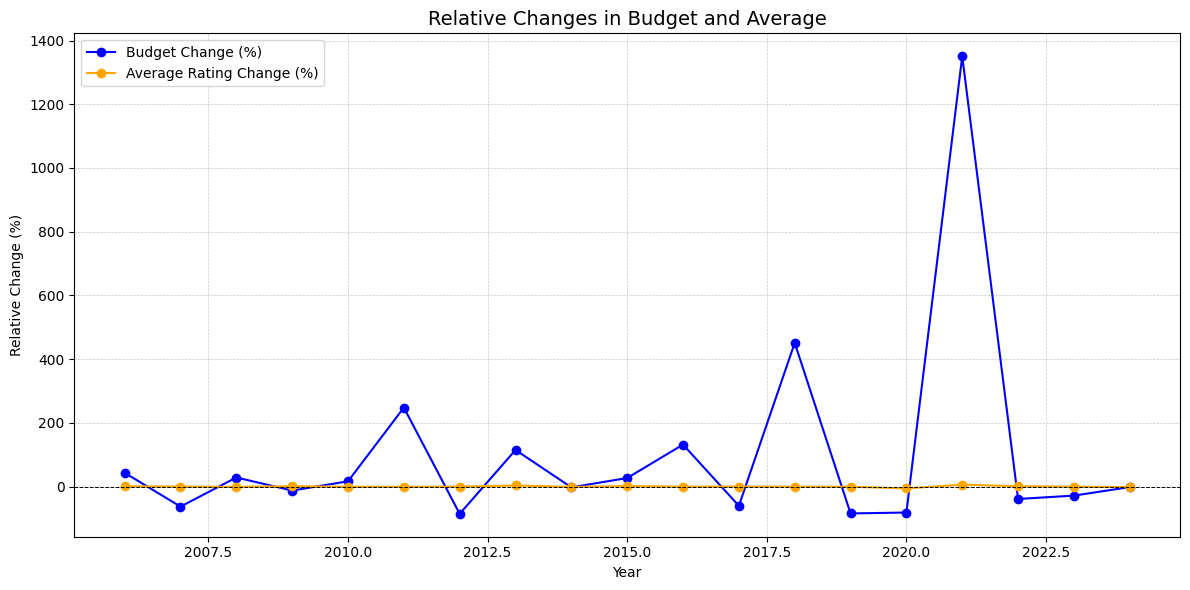

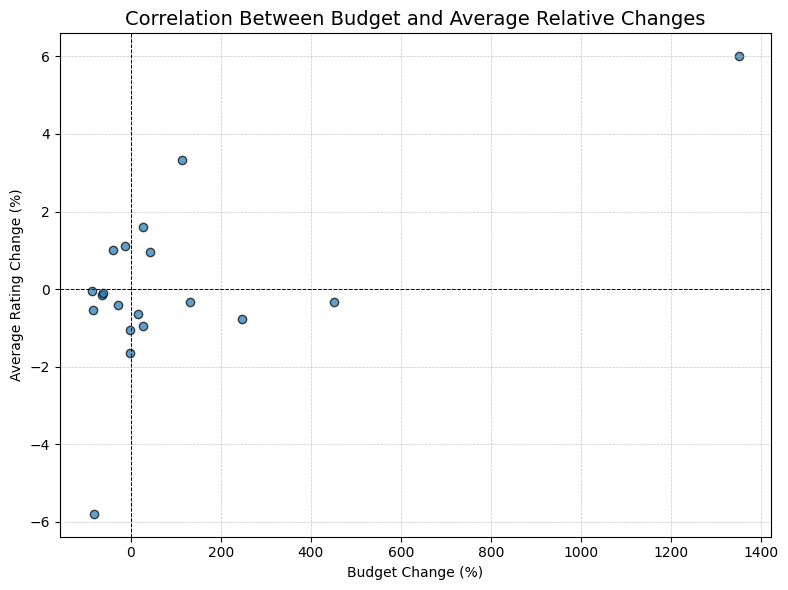

Correlation coefficient between Budget Change and Average Relative Changes: 0.63


In [8]:
# Perform relative change analysis
for variable, label in relative_variables_to_analyze.items():
    # Line chart of relative changes
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data_full['year'], grouped_data_full['budget_change'], label='Budget Change (%)', marker='o', color='blue')
    plt.plot(grouped_data_full['year'], grouped_data_full[variable], label=label, marker='o', color='orange')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.title(f'Relative Changes in Budget and {label.split()[0]}', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Relative Change (%)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Scatter plot for correlation of relative changes
    plt.figure(figsize=(8, 6))
    plt.scatter(grouped_data_full['budget_change'], grouped_data_full[variable], alpha=0.7, edgecolors='k')
    plt.title(f'Correlation Between Budget and {label.split()[0]} Relative Changes', fontsize=14)
    plt.xlabel('Budget Change (%)')
    plt.ylabel(label)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Calculate and display correlation coefficient
    correlation_coefficient = grouped_data_full[['budget_change', variable]].corr().iloc[0, 1]
    print(f'Correlation coefficient between Budget Change and {label.split()[0]} Relative Changes: {correlation_coefficient:.2f}')

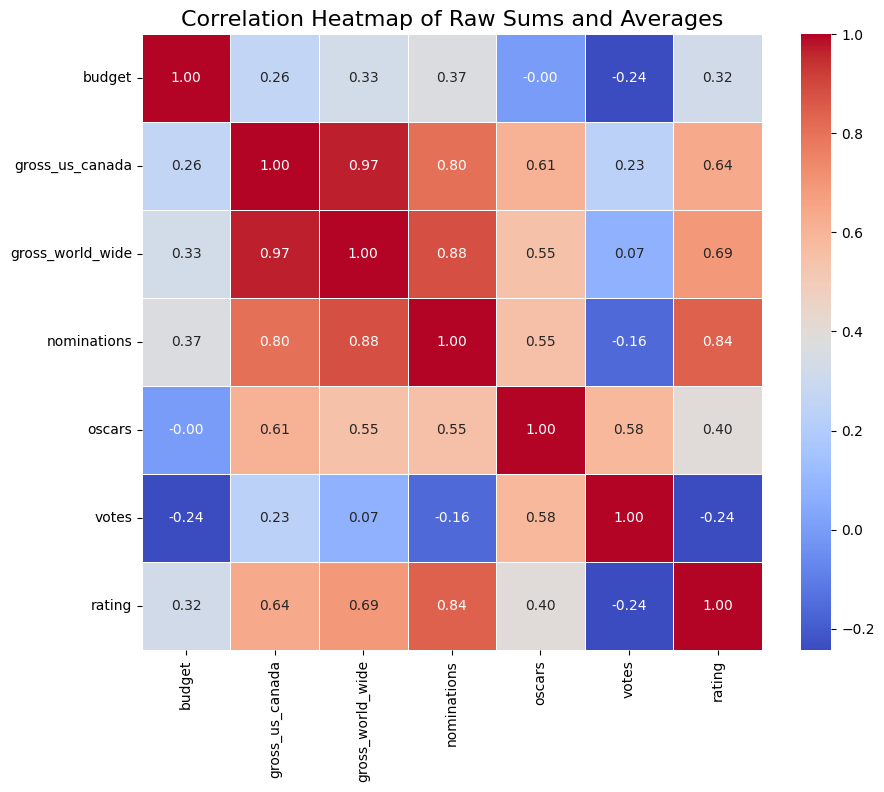

In [9]:
import seaborn as sns

# Heatmap for raw sums and averages
raw_correlation_matrix = grouped_data_full[[
    'budget',
    'gross_us_canada',
    'gross_world_wide',
    'nominations',
    'oscars',
    'votes',
    'rating'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(raw_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Raw Sums and Averages', fontsize=16)
plt.show()

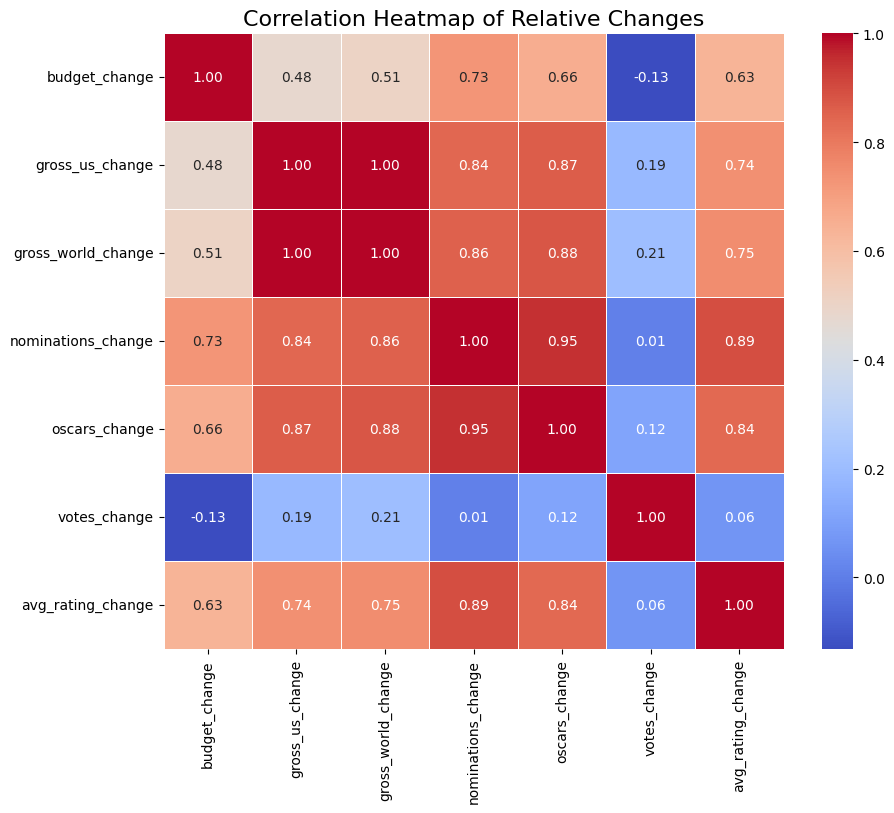

In [10]:
# Heatmap for relative changes
relative_correlation_matrix = grouped_data_full[[
    'budget_change',
    'gross_us_change',
    'gross_world_change',
    'nominations_change',
    'oscars_change',
    'votes_change',
    'avg_rating_change'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(relative_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Relative Changes', fontsize=16)
plt.show()